Implementation of Least Square (prac 1)

In [ ]:
!pip install scipy
!pip install numpy

import numpy as np
from scipy.optimize import leastsq
# Sample data
x = np.array([22,44,21,56,77])
y = np.array([56,88,90,33,32])

# Define the model function (in this case, a linear function y = mx + c)
def linear_model(params, x):
    m, c = params
    return m * x + c

# Define the residuals function (difference between actual and predicted values)
def residuals(params, y, x):
    return y - linear_model(params, x)

# Initial guess for the parameters (slope and intercept)
initial_params = [1, 1]

# Perform the least squares optimization
result = leastsq(residuals, initial_params, args=(y, x))

# Extract the optimized parameters
m_opt, c_opt = result[0]

# Print the results
print(f"Optimized slope (m): {m_opt}")
print(f"Optimized intercept (c): {c_opt}")



Optimized slope (m): -0.8236865538775313
Optimized intercept (c): 96.04220837064368




```
```

Implementation of Generalized Method of Moments (GMM) (prac 2)


In [ ]:
!pip install numpy
!pip install scipy

import numpy as np
from scipy.optimize import minimize

# Simulated data for demonstration
np.random.seed(42)
n = 100
x = np.random.rand(n)
epsilon = np.random.normal(0, 1, n)
beta_true = [2.5, 1.7]
y = beta_true[0] + beta_true[1] * x + epsilon

# Define the moment condition function
def moment_conditions(params, x, y):
    beta0, beta1 = params
    return y - beta0 - beta1 * x

# Define the GMM objective function
def gmm_objective(params, x, y):
    moments = moment_conditions(params, x, y)
    return moments.T @ moments

# Initial guess for the parameters
initial_guess = [0.5, 0.5]

# Estimate parameters using GMM
result = minimize(gmm_objective, initial_guess, args=(x, y))

# Extract estimated parameters
estimated_beta0, estimated_beta1 = result.x

print("Estimated beta0:", estimated_beta0)
print("Estimated beta1:", estimated_beta1)

Estimated beta0: 2.7150961234467963
Estimated beta1: 1.2402268216601595


Vector Auto Regression  (VAR) (prac 3)

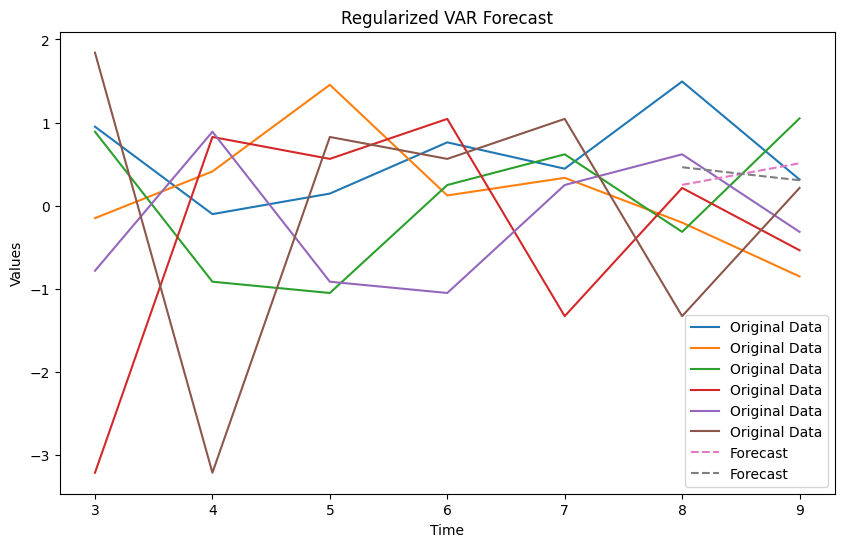

In [ ]:
!pip install numpy
!pip install pandas
!pip install statsmodels.
!pip install sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.linear_model import RidgeCV

# Generate example data
np.random.seed(0)
nobs = 10
data = np.random.randn(nobs, 2)  # 2 variables

# Convert data to DataFrame
columns = ['variable1', 'variable2']
df = pd.DataFrame(data, columns=columns)

# Create lagged dataset
lags = 2
data_lagged = df.diff().dropna()
for lag in range(1, lags + 1):
    for col in columns:
        df[f'{col}_lag{lag}'] = data_lagged[col].shift(lag)

# Drop rows with missing values
df = df.dropna()

# Split data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Fit Ridge VAR model
X_train = train_data.drop(columns=columns)
y_train = train_data[columns]
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])  # Adjust alphas as needed
ridge_model.fit(X_train, y_train)
coefficients = ridge_model.coef_

# Forecast using the model
X_test = test_data.drop(columns=columns)
forecast = ridge_model.predict(X_test)

# Convert forecast results to DataFrame
forecast_df = pd.DataFrame(forecast, columns=columns, index=test_data.index)

# Plot original data and forecasted values

plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Data')
plt.plot(forecast_df, label='Forecast', linestyle='dashed')
plt.legend()
plt.title('Regularized VAR Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


Vector Error Correction Model (VECM) (prac 4)

In [ ]:
!pip install numpy
!pip install pandas
!pip install statsmodels.
!pip install sklearn

import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

# Generate some example data
np.random.seed(0)
nobs = 100
data = np.random.randn(nobs, 2)
data[:, 1] = 2 * data[:, 0] + np.random.randn(nobs)  # Create a cointegrated relationship

# Create a DataFrame from the generated data
df = pd.DataFrame(data, columns=['series1', 'series2'])

# Estimate the cointegration rank using the trace statistic
coint_rank_result = select_coint_rank(df, det_order=-1, k_ar_diff=2)

# Extract the cointegration rank from the result object
coint_rank = coint_rank_result.rank

# Initialize and fit the VECM model
model = VECM(df, k_ar_diff=2, coint_rank=coint_rank)
results = model.fit()

# Print the summary of the model
print(results.summary())


Det. terms outside the coint. relation & lagged endog. parameters for equation series1
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.series1     0.5041      0.349      1.445      0.149      -0.180       1.188
L1.series2    -0.1558      0.156     -0.997      0.319      -0.462       0.150
L2.series1    -0.0521      0.238     -0.219      0.827      -0.518       0.414
L2.series2    -0.0429      0.101     -0.426      0.670      -0.240       0.154
Det. terms outside the coint. relation & lagged endog. parameters for equation series2
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.series1     1.0701      0.784      1.365      0.172      -0.466       2.607
L1.series2    -0.2158      0.351     -0.615      0.539      -0.904       0.472
L2.series1    -0.1612      0.534    

ARCH (prac 5.1)

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 13.5 MB/s eta 0:00:00


Iteration:      1,   Func. Count:      5,   Neg. LLF: 4590.563706721207
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3338.0695724382663
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1405.978023298489
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1405.9141243462877
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1405.873835051491
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1405.8735509518006
Iteration:      7,   Func. Count:     35,   Neg. LLF: 1405.873521579741
Iteration:      8,   Func. Count:     38,   Neg. LLF: 1405.8735215795655
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1405.873521579741
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:

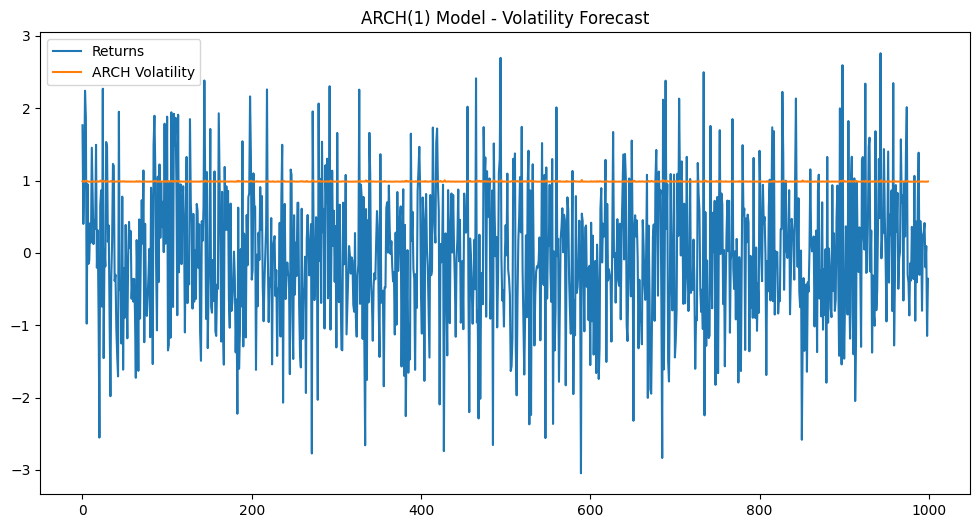

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Generate synthetic data for demonstration
np.random.seed(0)
n_obs = 1000
returns = np.random.normal(0, 1, n_obs)  # Generate random normal returns

# Estimate ARCH(1) model
arch_model_arch = arch_model(returns, vol='ARCH', p=1)
arch_results = arch_model_arch.fit()

# Print model summary
print(arch_results.summary())

# Plot original returns and estimated conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(returns, label='Returns')
plt.plot(arch_results.conditional_volatility, label='ARCH Volatility')
plt.legend()
plt.title('ARCH(1) Model - Volatility Forecast')
plt.show()


GARCH (prac 5.2)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8571473166.555978
Iteration:      2,   Func. Count:     14,   Neg. LLF: 117868.56397289249
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1405.5971720584114
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1417.0490416954644
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1412.4238669917024
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1410.3276416076064
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1411.1034895089213
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1411.9915926501383
Iteration:      9,   Func. Count:     60,   Neg. LLF: 1412.3741562154037
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1412.1352736228596
Iteration:     11,   Func. Count:     72,   Neg. LLF: 4471.452172969959
Iteration:     12,   Func. Count:     82,   Neg. LLF: 456844629.44939095
Iteration:     13,   Func. Count:     90,   Neg. LLF: 1412.5737642345318
Iteration:     14,   Func. Count:     96,   Neg. LLF:

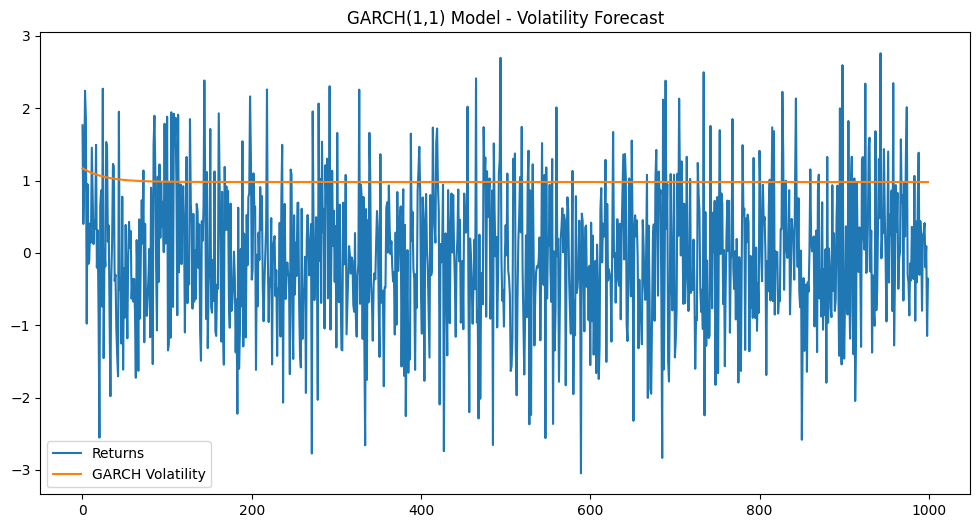

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Generate synthetic data for demonstration
np.random.seed(0)
n_obs = 1000
returns = np.random.normal(0, 1, n_obs)  # Generate random normal returns

# Estimate GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

# Print model summary
print(garch_results.summary())

# Plot original returns and estimated conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(returns, label='Returns')
plt.plot(garch_results.conditional_volatility, label='GARCH Volatility')
plt.legend()
plt.title('GARCH(1,1) Model - Volatility Forecast')
plt.show()


SV (prac 5.3)

[100.          98.45069034  96.12266816  98.31643366 101.55571404
  95.02160445  93.61551874  95.79983629  97.20558641  96.69641429
  97.61551704  99.28026551 100.78938815 100.02975073 100.06964082
 100.33353033 103.10438117 104.53801975 105.01049048 104.58115598
 105.95722532 106.06106182 112.44998008 111.58118025 109.85430292
 109.80450855 111.21340891 110.58809917 106.43482304 105.73648489
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          

<ipython-input-5-f16057595263>:11: RuntimeWarning: invalid value encountered in sqrt
  volatility = volatility + gamma * (theta - volatility) + sigma * epsilon * np.sqrt(volatility)


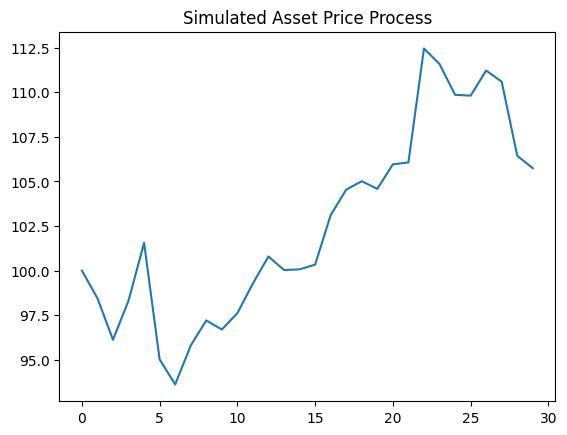

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the functions for simulating the stochastic volatility and asset price processes
def simulate_volatility(gamma, theta, sigma, volatility):
  # Generate a random number from a standard normal distribution
  epsilon = random.normalvariate(0, 1)

  # Update the volatility
  volatility = volatility + gamma * (theta - volatility) + sigma * epsilon * np.sqrt(volatility)

  return volatility

def simulate_asset_price(S0, r, volatility):
  # Generate a random number from a standard normal distribution
  epsilon = random.normalvariate(0, 1)

  # Update the asset price
  S = S0 * np.exp((r - volatility**2 / 2) * dt + volatility * epsilon * np.sqrt(dt))

  return S



# Parameters of the stochastic volatility model
gamma = 2.0  # Mean reversion speed
theta = 0.2  # Long-term mean volatility
sigma = 0.1  # Volatility of volatility

# Initialize the volatility
volatility = theta

# Simulate the stochastic volatility and asset price processes for 100 time steps
S0 = 100.0  # Initial asset price
r = 0.05  # Interest rate
dt = 0.01  # Time step

S = np.zeros(100)
S[0] = S0

for i in range(1, 100):
  # Simulate the stochastic volatility process
  volatility = simulate_volatility(gamma, theta, sigma, volatility)

  # Simulate the asset price process
  S[i] = simulate_asset_price(S[i - 1], r, volatility)
print(S)
# Plot the simulated asset price process
plt.plot(S)
plt.title('Simulated Asset Price Process')
plt.show()



prac 6

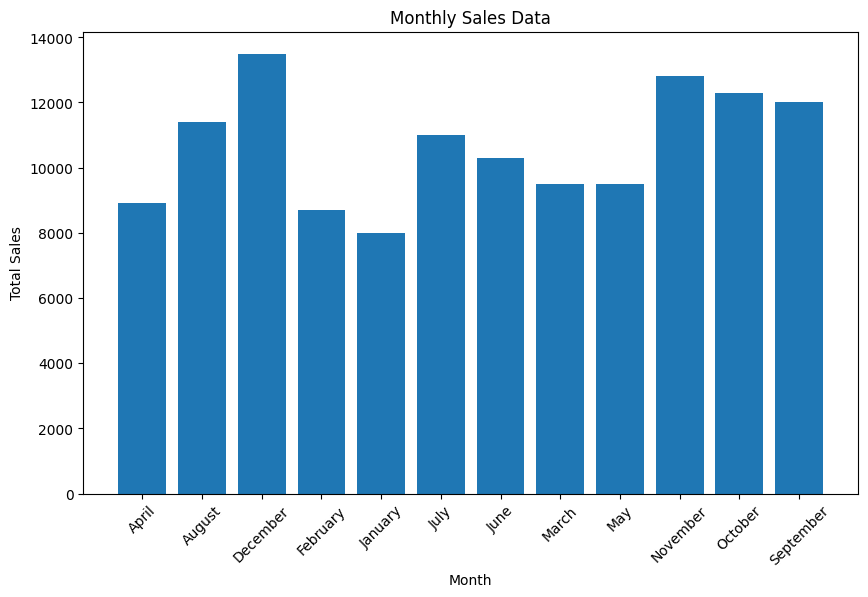

Average Sales: $5329.17
Best Selling Product: Product_A


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Data
data = pd.read_csv('sales_data.csv')

# Step 2: Data Analysis
# Calculate total sales for each month
monthly_sales = data.groupby('Month')['Sales'].sum()

# Calculate average sales
average_sales = data['Sales'].mean()

# Find the best-selling product
best_selling_product = data.groupby('Product')['Sales'].sum().idxmax()

# Step 3: Data Visualization
# Plotting the monthly sales data
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Data')
plt.xticks(rotation=45)
plt.show()

# Step 4: Display Results
# Display average sales and best-selling product
print('Average Sales: ${:.2f}'.format(average_sales))
print('Best Selling Product: {}'.format(best_selling_product))
